In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from category_encoders import BinaryEncoder


In [3]:
df = pd.read_excel("C:/Users/Toshal/Desktop/DM project/New folder/data.xlsx")


In [4]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income,qualification,policy,num_policies,cltv
0,555,5,Male,Urban,0,Silver,More than 10L,Masters,a,1,5263
1,625,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,More than 1,6064
2,821,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,More than 1,8314
3,1498,5,Male,Urban,0,Silver,More than 10L,Masters,c,1,13995
4,559,5,Male,Urban,0,Silver,More than 10L,Bachelors,a,1,4822


In [5]:
df['Area'] = (df['Area'] == "Urban").astype(int)

df['Gender'] = (df['Gender'] == "Male").astype(int)

df['type_of_policy'] = (df['type_of_policy'] == "Silver").astype(int)

df['num_policies'] = (df['num_policies'] == "More than 1").astype(int)


In [6]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income,qualification,policy,num_policies,cltv
0,555,5,1,1,0,1,More than 10L,Masters,a,0,5263
1,625,5,1,1,0,1,More than 10L,Bachelors,a,1,6064
2,821,5,1,1,0,1,More than 10L,Bachelors,a,1,8314
3,1498,5,1,1,0,1,More than 10L,Masters,c,0,13995
4,559,5,1,1,0,1,More than 10L,Bachelors,a,0,4822


In [7]:
df['vintage'].unique()

array([5, 4, 3, 2, 1, 0, 6], dtype=int64)

In [8]:
encoder = BinaryEncoder(cols=['qualification'], return_df=True)
df = encoder.fit_transform(df)
encoder = BinaryEncoder(cols=['policy'], return_df=True)
df = encoder.fit_transform(df)
encoder = BinaryEncoder(cols=['income'], return_df=True)
df = encoder.fit_transform(df)

In [9]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income_0,income_1,qualification_0,qualification_1,qualification_2,policy_0,policy_1,num_policies,cltv
0,555,5,1,1,0,1,0,1,0,0,1,0,1,0,5263
1,625,5,1,1,0,1,0,1,0,1,0,0,1,1,6064
2,821,5,1,1,0,1,0,1,0,1,0,0,1,1,8314
3,1498,5,1,1,0,1,0,1,0,0,1,1,0,0,13995
4,559,5,1,1,0,1,0,1,0,1,0,0,1,0,4822


In [10]:
df['num_policies'].unique()

array([0, 1])

In [11]:
import seaborn as sns
#sns.kdeplot(df['claim_amount'], fill=True)
#plt.title('Data Distribution')
#plt.xlabel('Value')
#plt.ylabel('Density')
#plt.show()



def plot(dataframe, column):
   
    sns.kdeplot(dataframe[column], fill=True)
    plt.title(f'Data Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

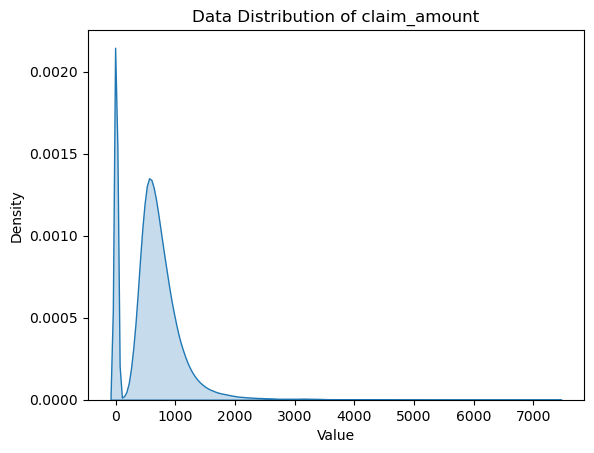

In [12]:
plot(df,'claim_amount')

In [13]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [14]:
outliers_detected = detect_outliers(df, 'claim_amount')
outliers_detected

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income_0,income_1,qualification_0,qualification_1,qualification_2,policy_0,policy_1,num_policies,cltv
3,1498,5,1,1,0,1,0,1,0,0,1,1,0,0,13995
24,1586,5,1,1,0,1,0,1,0,0,1,0,1,0,14180
124,2041,5,1,1,0,1,0,1,0,1,0,0,1,0,18227
210,1659,5,1,1,0,1,0,1,0,1,0,1,0,0,17286
250,2508,5,1,1,0,1,0,1,0,1,0,1,0,0,22205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,3401,3,1,0,0,1,1,1,0,1,0,1,0,0,20642
1016356,2875,2,1,0,1,1,1,1,1,0,0,0,1,0,17267
1016517,1751,2,1,0,1,1,1,1,1,0,0,0,1,0,9643
1016656,1675,2,1,0,1,1,1,1,1,0,0,1,0,0,8498


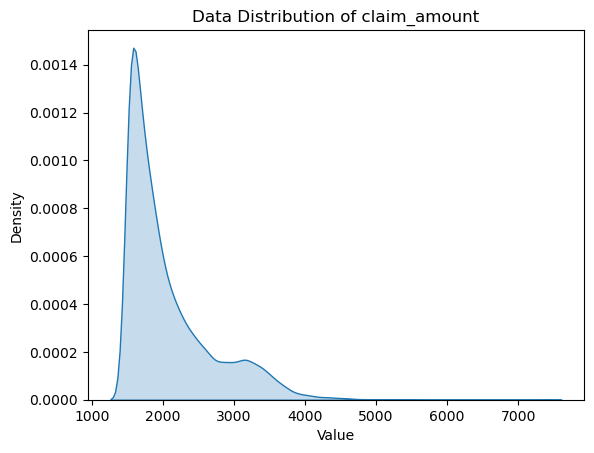

In [15]:
plot(outliers_detected, 'claim_amount' )

In [16]:
from sklearn.preprocessing import StandardScaler

def normalize(df, column):
    scaler = StandardScaler()



    df[column] = scaler.fit_transform(df[[column]])

In [17]:
normalize(df,'claim_amount')

In [18]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income_0,income_1,qualification_0,qualification_1,qualification_2,policy_0,policy_1,num_policies,cltv
0,-0.168269,5,1,1,0,1,0,1,0,0,1,0,1,0,5263
1,-0.017540,5,1,1,0,1,0,1,0,1,0,0,1,1,6064
2,0.404499,5,1,1,0,1,0,1,0,1,0,0,1,1,8314
3,1.862258,5,1,1,0,1,0,1,0,0,1,1,0,0,13995
4,-0.159656,5,1,1,0,1,0,1,0,1,0,0,1,0,4822


In [19]:
outliers_detected1 = detect_outliers(df, 'claim_amount')
outliers_detected1

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income_0,income_1,qualification_0,qualification_1,qualification_2,policy_0,policy_1,num_policies,cltv
3,1.862258,5,1,1,0,1,0,1,0,0,1,1,0,0,13995
24,2.051745,5,1,1,0,1,0,1,0,0,1,0,1,0,14180
124,3.031480,5,1,1,0,1,0,1,0,1,0,0,1,0,18227
210,2.208933,5,1,1,0,1,0,1,0,1,0,1,0,0,17286
250,4.037053,5,1,1,0,1,0,1,0,1,0,1,0,0,22205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,5.959917,3,1,0,0,1,1,1,0,1,0,1,0,0,20642
1016356,4.827301,2,1,0,1,1,1,1,1,0,0,0,1,0,17267
1016517,2.407034,2,1,0,1,1,1,1,1,0,0,0,1,0,9643
1016656,2.243386,2,1,0,1,1,1,1,1,0,0,1,0,0,8498


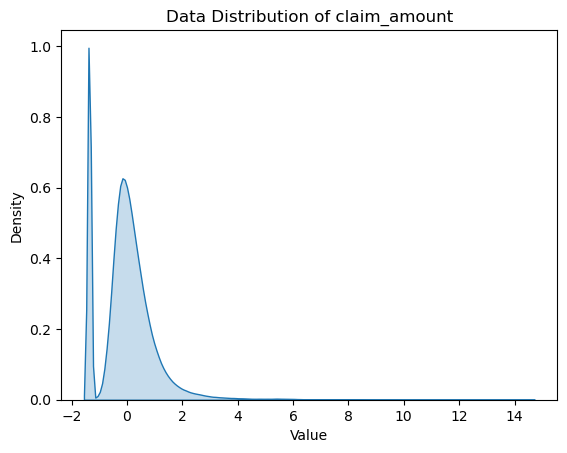

In [20]:
plot(df, 'claim_amount' )

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('cltv', axis=1)
y = df['cltv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
mse, r_squared

(1524711.0535751195, 0.8969009352856725)

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r_squared = r2_score(y_test, dt_predictions)

dt_mse, dt_r_squared

(1819949.3294284933, 0.876937290346534)